In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv("alldata.csv",encoding='latin1', header=None)

df.head()


,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [15]:
df.columns = ['sentiment', 'text']

print(df.head())


  sentiment                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


In [16]:
text_data=df['text']
text_data=text_data.dropna()


Convert Text → Numerical (TF-IDF)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=1000,     # Limit features (important)
    stop_words='english',  # Remove common words
    lowercase=True
)

# Convert text into TF-IDF matrix
X = tfidf.fit_transform(text_data)

print(X.shape)


(4846, 1000)


Why Limit Features (500–1000)?

Because:

✔ reduces noise
✔ faster clustering
✔ avoids memory issues
✔ improves model performance


Dendrogram Construction & Analysis
Build a dendrogram using a subset of articles
Observe:
Where large vertical jumps occur
What they indicate about topic separation
 
Apply Hierarchical Clustering
Use Agglomerative Hierarchical Clustering
Choose an appropriate linkage method
 
Validation Without Labels (Critical Thinking)
Since this is unsupervised:
How do you judge clustering quality?
mertic:
Silhouette score 
 

In [ ]:
#sample
sample_size = 200   # choose small subset
X_sample = X[:sample_size].toarray()


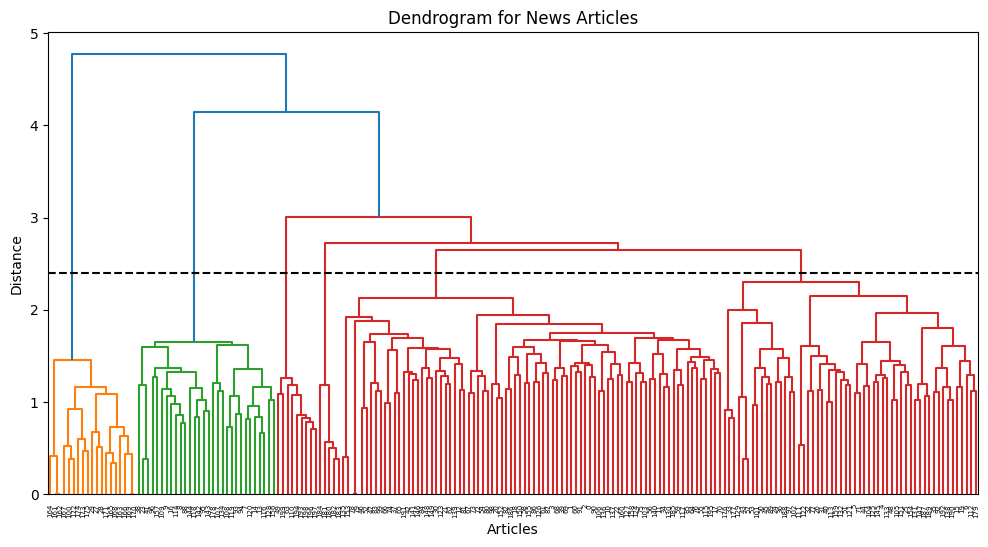

In [26]:
#create dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Create linkage matrix
Z = linkage(X_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(12,6))
dendrogram(Z)
plt.axhline(y=2.4,color='black',linestyle='--')
plt.title("Dendrogram for News Articles")
plt.xlabel("Articles")
plt.ylabel("Distance")
plt.show()


In [24]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(
    n_clusters=10,
    linkage='ward'
)

labels = model.fit_predict(X.toarray())


In [25]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)

print("Silhouette Score:", score)


Silhouette Score: 0.008041992755858528
